# Titanic Dataset Analysis Project

## Step 1: Data Loading and Initial Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the Dataset
titanic = pd.read_csv("C:/Users/Sunil Kannur/OneDrive/Desktop/-/Elevate Labs Internship/Project - 1/Titanic-Dataset.csv")

In [4]:
#Display basic Information
print(titanic.info())
print(titanic.head())
print(titanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

## Step 2: Data Cleaning

In [5]:
#Check for missing values
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Handle missing values
# Age - fill with median age grouped by Pclass and Sex
titanic['Age'] = titanic.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [8]:
# Embarked - only 2 missing, fill with mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [10]:
# Fare - one missing value, fill with median of Pclass
titanic['Cabin'] = titanic.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [11]:
# Verify no more missing values
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


## Step 3: Feature Engineering

In [12]:
# Create family size feature
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [13]:
# Create is alone feature
titanic['IsAlone'] = titanic['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

In [14]:
# Extract titles from names
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_4916\2057315392.py:2: SyntaxWarning: invalid escape sequence '\.'
  titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [15]:
# Group rare titles
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

In [16]:
# Create age groups
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=[0, 12, 18, 30, 50, 100], 
                            labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

In [17]:
# Create fare groups
titanic['FareGroup'] = pd.qcut(titanic['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

## Step 4: Exploratory Data Analysis
### Survival Rate Overview (in Both mean and sum)

In [18]:
survival_rate = titanic['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

Overall survival rate: 38.38%


In [19]:
# Survival by gender
gender_survival = titanic.groupby('Sex')['Survived'].mean()
print("\nSurvival by gender:")
print(gender_survival)


Survival by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [20]:
# Survival by passenger class
class_survival = titanic.groupby('Pclass')['Survived'].mean()
print("\nSurvival by passenger class:")
print(class_survival)


Survival by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [21]:
# Overall number of survivors in Total Sum format
total_survivors = titanic['Survived'].sum()
print(f"Total number of survivors: {total_survivors}")

Total number of survivors: 342


In [22]:
# Number of survivors by gender
gender_survivors = titanic.groupby('Sex')['Survived'].sum()
print("\nNumber of survivors by gender:")
print(gender_survivors)


Number of survivors by gender:
Sex
female    233
male      109
Name: Survived, dtype: int64


In [23]:
# Number of survivors by passenger class
class_survivors = titanic.groupby('Pclass')['Survived'].sum()
print("\nNumber of survivors by passenger class:")
print(class_survivors)


Number of survivors by passenger class:
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


### Visualization 1: Survival by Gender and Class

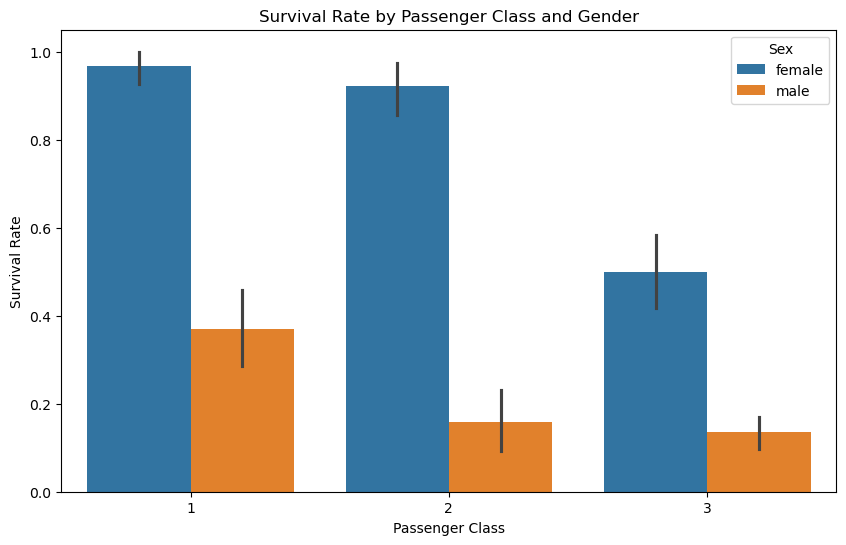

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)
plt.title('Survival Rate by Passenger Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

### Visualization 2: Age Distribution of Survivors vs Non-Survivors

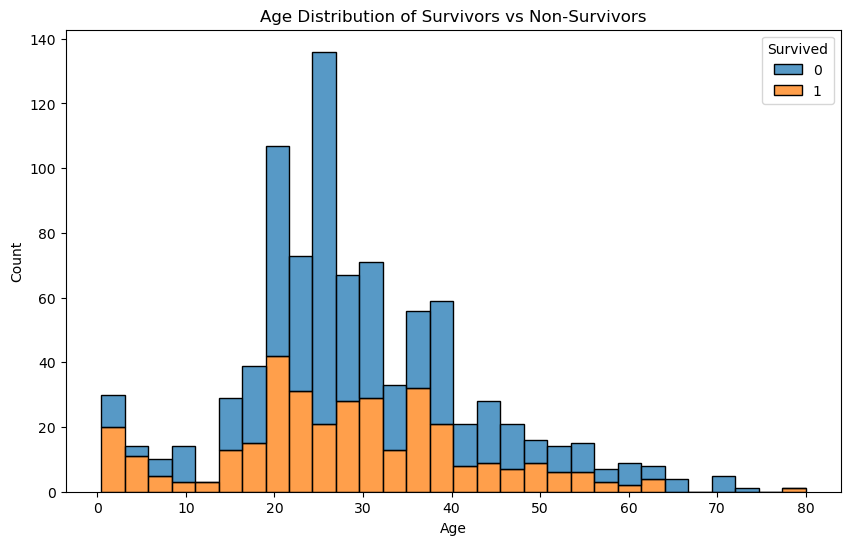

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Visualization 3: Survival Rate by Family Size

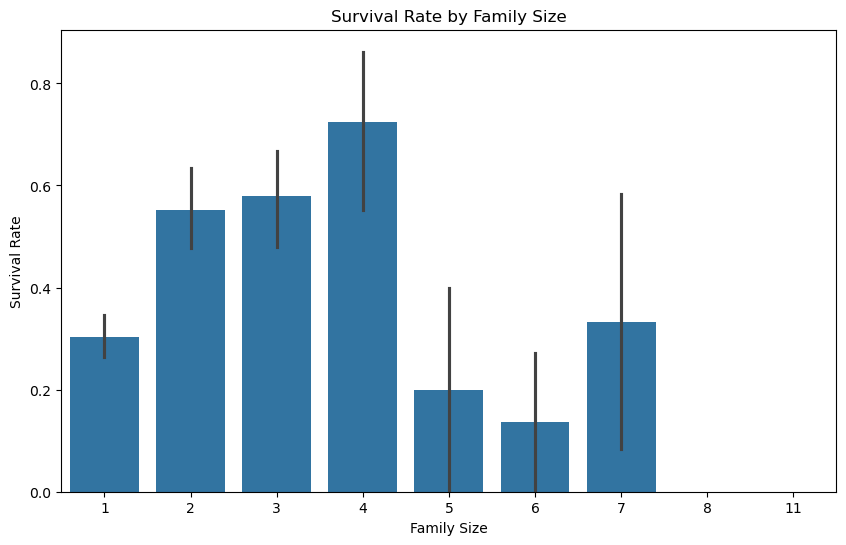

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

### Visualization 4: Survival Rate by Title

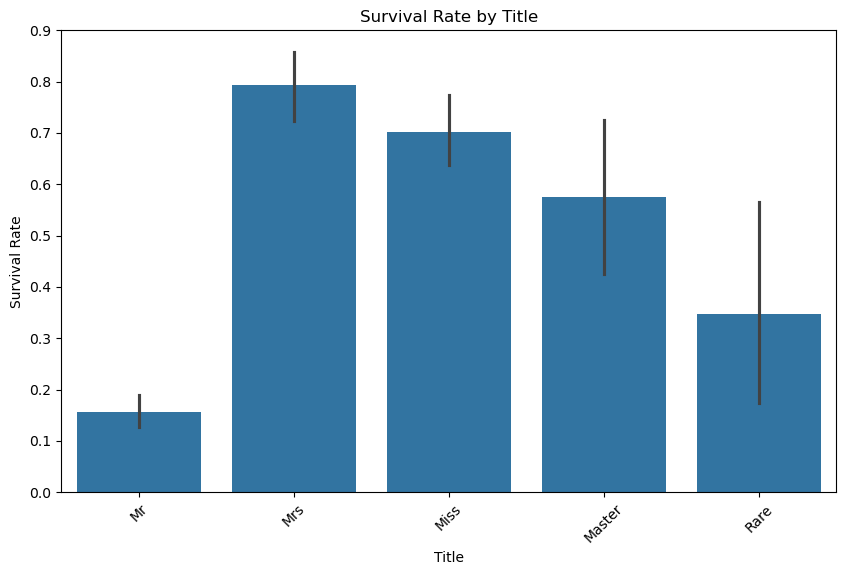

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=titanic)
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

### Visualization 5: Correlation Heatmap

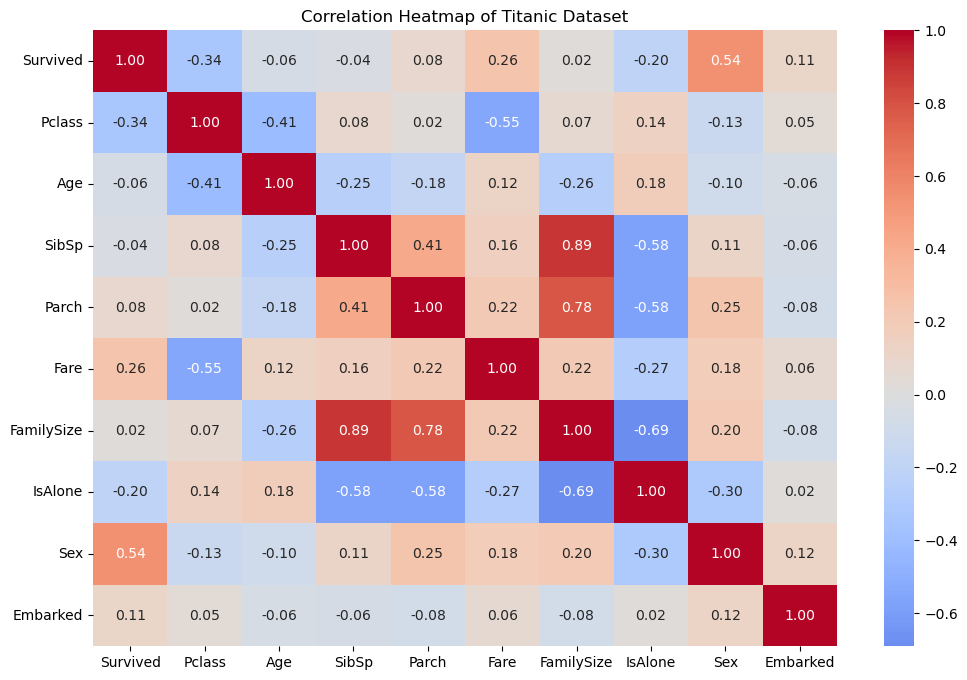

In [29]:
# Create a copy of the dataframe for correlation analysis
titanic_corr = titanic.copy()

# Convert categorical variables to numerical
titanic_corr['Sex'] = titanic_corr['Sex'].map({'male': 0, 'female': 1})
titanic_corr['Embarked'] = titanic_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select only numerical columns for correlation
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
titanic_corr = titanic_corr[numerical_cols + ['Sex', 'Embarked']]

# Create correlation matrix
corr_matrix = titanic_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

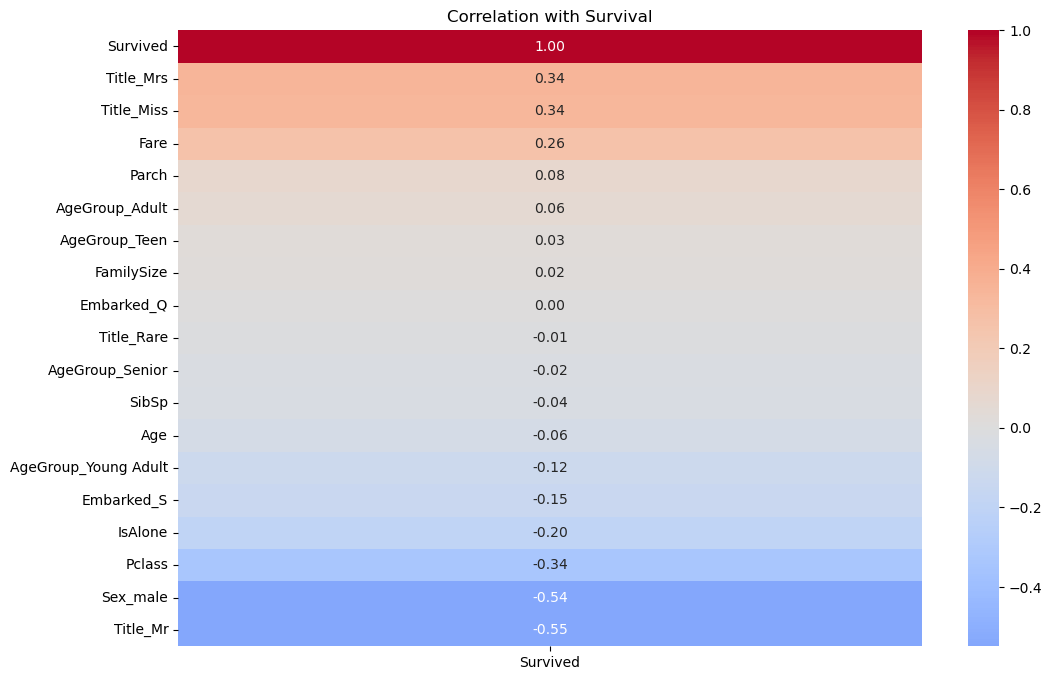

In [30]:
# Alternative approach with one-hot encoding
titanic_corr = titanic.copy()

# One-hot encode categorical variables
titanic_corr = pd.get_dummies(titanic_corr, columns=['Sex', 'Embarked', 'Title', 'AgeGroup'], drop_first=True)

# Select numerical columns
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
titanic_corr = titanic_corr[numerical_cols + [col for col in titanic_corr.columns if col.startswith(('Sex_', 'Embarked_', 'Title_', 'AgeGroup_'))]]

# Create correlation matrix
corr_matrix = titanic_corr.corr()

# Plot heatmap (showing only top correlations with Survived)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Survived']].sort_values('Survived', ascending=False), 
            annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation with Survival')
plt.show()

## Step 5: Advanced Analysis
### Survival by Age Group and Class

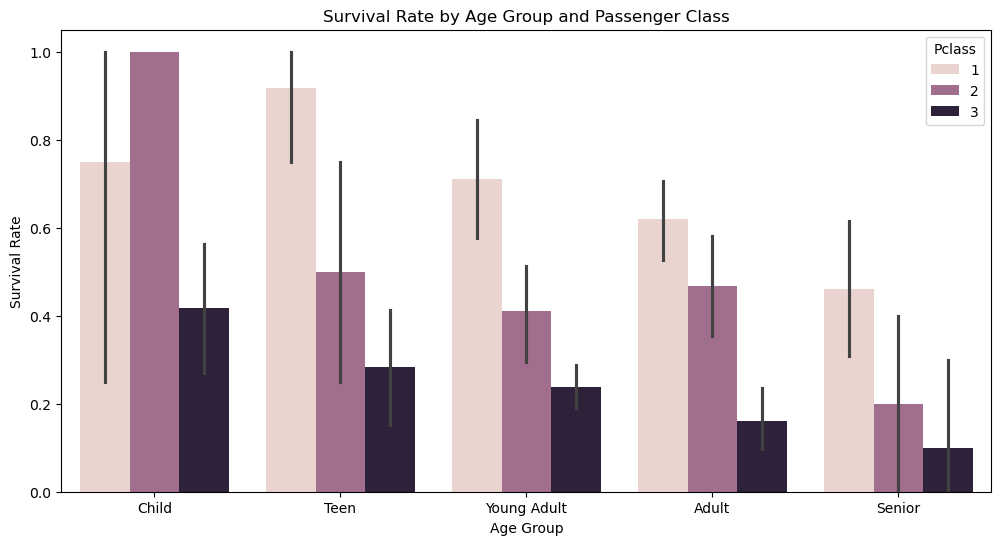

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=titanic)
plt.title('Survival Rate by Age Group and Passenger Class')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

### Survival by Fare Group and Class

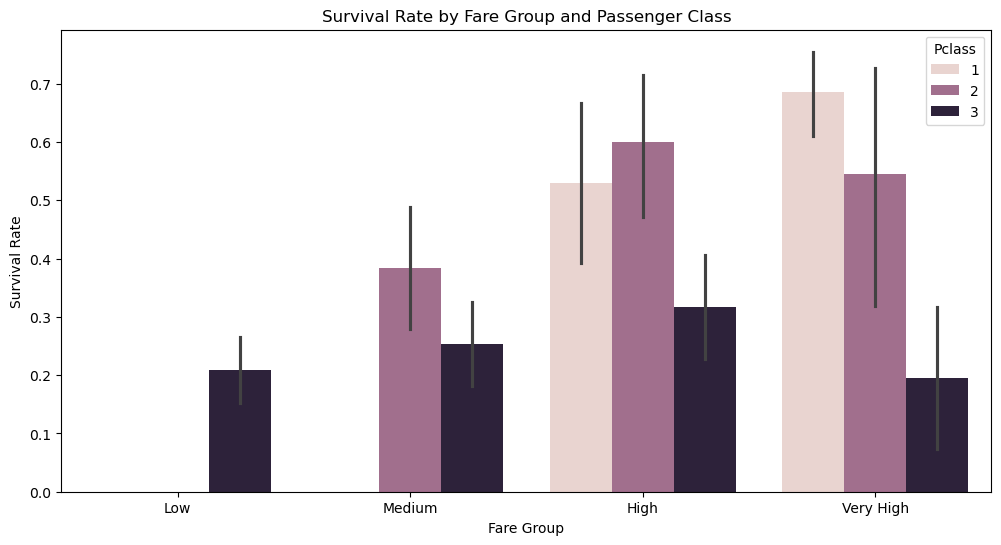

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='FareGroup', y='Survived', hue='Pclass', data=titanic)
plt.title('Survival Rate by Fare Group and Passenger Class')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()

### Survival by Embarkation Port

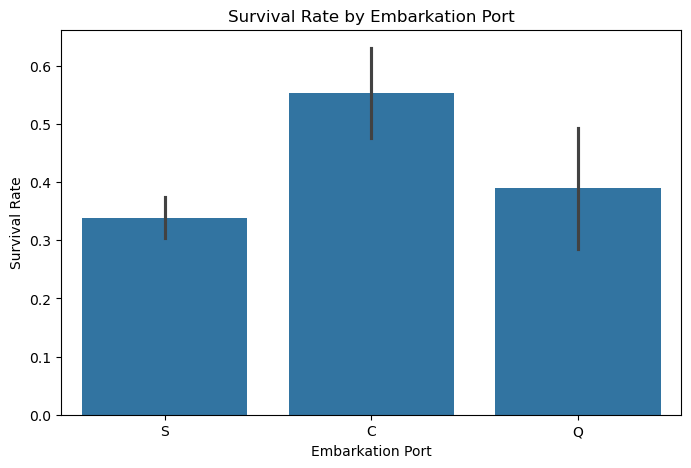

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=titanic)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

## Step 6: Key Insights and Conclusions

In [34]:
# Calculate key statistics
women_survival = titanic[titanic['Sex'] == 'female']['Survived'].mean()
men_survival = titanic[titanic['Sex'] == 'male']['Survived'].mean()
first_class_survival = titanic[titanic['Pclass'] == 1]['Survived'].mean()
third_class_survival = titanic[titanic['Pclass'] == 3]['Survived'].mean()

print("\nKey Insights:")
print(f"- Female survival rate: {women_survival:.2%} vs Male survival rate: {men_survival:.2%}")
print(f"- First class survival rate: {first_class_survival:.2%} vs Third class: {third_class_survival:.2%}")

# Most significant factors
print("\nMost significant factors affecting survival:")
print("1. Gender (women had much higher survival rates)")
print("2. Passenger class (higher classes had better survival)")
print("3. Age (children had higher survival rates)")
print("4. Family size (small families had better survival)")
print("5. Fare paid (higher fares correlated with better survival)")


Key Insights:
- Female survival rate: 74.20% vs Male survival rate: 18.89%
- First class survival rate: 62.96% vs Third class: 24.24%

Most significant factors affecting survival:
1. Gender (women had much higher survival rates)
2. Passenger class (higher classes had better survival)
3. Age (children had higher survival rates)
4. Family size (small families had better survival)
5. Fare paid (higher fares correlated with better survival)


## Step 7: Final Visual Summary

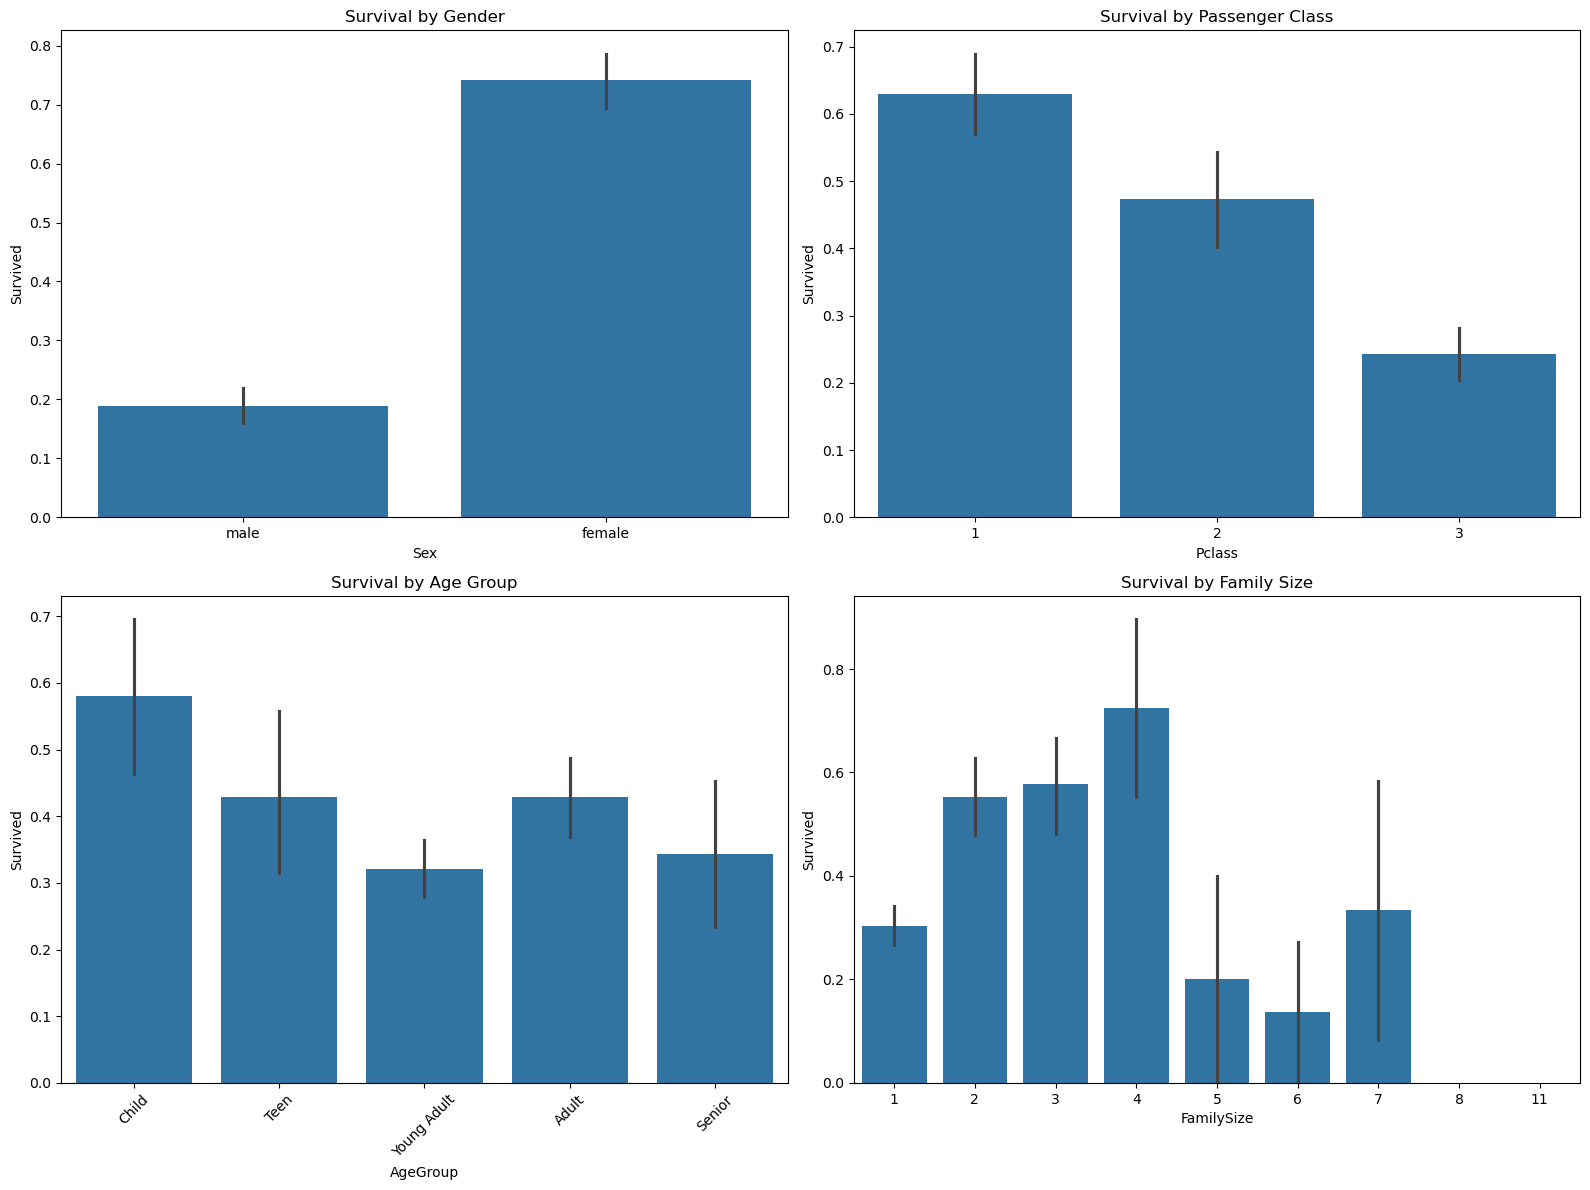

In [35]:
# Create a summary figure
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival by Gender')

plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival by Passenger Class')

plt.subplot(2, 2, 3)
sns.barplot(x='AgeGroup', y='Survived', data=titanic)
plt.title('Survival by Age Group')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.barplot(x='FamilySize', y='Survived', data=titanic)
plt.title('Survival by Family Size')

plt.tight_layout()
plt.show()